In [ ]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import random

In [43]:
# 스핀 격자 함수 (L x L 크기, 값 -1 또는 1)
def initialize_spins(L):
    return np.random.choice([-1, 1], size=(L, L))

In [44]:
# 메트로폴리스
def metropolis(spins, beta):
    L = spins.shape[0]
    # 격자의 모든 스핀을 한 번씩 업데이트
    for i in range(L):
        for j in range(L):
            # 랜덤한 위치 선택
            x, y = np.random.randint(0, L), np.random.randint(0, L)
            # 에너지 변화 계산
            delta_E = 2 * spins[x, y] * (spins[(x+1)%L, y] + spins[(x-1)%L, y] + spins[x, (y+1)%L] + spins[x, (y-1)%L])
            # 메트로폴리스 기준에 따라 스핀 플립 결정
            if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
                spins[x, y] = -spins[x, y]
    return spins

In [41]:
# Wolff 알고리즘을 사용하여 스핀 격자를 업데이트하는 함수
def wolff(spins, beta):
    L = spins.shape[0]
    # 클러스터에 스핀을 추가할 확률
    p_add = 1 - np.exp(-2 * beta)
    # 클러스터를 추적하기 위한 불리언 배열
    cluster = np.zeros_like(spins, dtype=bool)
    # 랜덤한 시작 위치 선택
    x, y = np.random.randint(0, L), np.random.randint(0, L)
    cluster[x, y] = True
    stack = [(x, y)]
    # 스택을 사용하여 클러스터 생성
    while stack:
        cx, cy = stack.pop()
        # 인접 스핀을 확인
        for nx, ny in [(cx+1, cy), (cx-1, cy), (cx, cy+1), (cx, cy-1)]:
            nx, ny = nx % L, ny % L
            # 클러스터에 속하지 않고 같은 스핀이며 추가 확률에 따라 클러스터에 추가
            if not cluster[nx, ny] and spins[nx, ny] == spins[cx, cy] and np.random.rand() < p_add:
                cluster[nx, ny] = True
                stack.append((nx, ny))
    # 클러스터 내부의 스핀을 플립
    spins[cluster] = -spins[cluster]
    return spins

In [40]:
# Swendsen-Wang 알고리즘을 사용하여 스핀 격자를 업데이트하는 함수
def swendsen_wang(spins, beta):
    L = spins.shape[0]
    # 클러스터에 스핀을 추가할 확률
    p_add = 1 - np.exp(-2 * beta)
    # 클러스터를 추적하기 위한 정수 배열
    clusters = np.zeros_like(spins, dtype=int)
    current_cluster = 1

    # 격자의 모든 스핀에 대해 클러스터 생성
    for i in range(L):
        for j in range(L):
            if clusters[i, j] == 0:
                stack = [(i, j)]
                clusters[i, j] = current_cluster
                while stack:
                    cx, cy = stack.pop()
                    # 인접 스핀을 확인
                    for nx, ny in [(cx+1, cy), (cx-1, cy), (cx, cy+1), (cx, cy-1)]:
                        nx, ny = nx % L, ny % L
                        # 클러스터에 속하지 않고 같은 스핀이며 추가 확률에 따라 클러스터에 추가
                        if clusters[nx, ny] == 0 and spins[nx, ny] == spins[cx, cy] and np.random.rand() < p_add:
                            clusters[nx, ny] = current_cluster
                            stack.append((nx, ny))
                current_cluster += 1

    # 생성된 클러스터들에 대해 확률적으로 스핀을 플립
    for k in range(1, current_cluster):
        if np.random.rand() < 0.5:
            spins[clusters == k] = -spins[clusters == k]

    return spins

In [39]:
# 주어진 베타 값에 대해 평균 스핀 절댓값을 계산하는 함수
def average_spin_abs(L, beta, method, n_steps=1000, n_eq_steps=100):
    spins = initialize_spins(L)

    # 초기 평형화 과정
    for _ in range(n_eq_steps):
        spins = method(spins, beta)

    total_spin = 0.0
    # 주어진 스텝 수만큼 시뮬레이션을 실행하여 평균 스핀 절댓값 계산
    for _ in range(n_steps):
        spins = method(spins, beta)
        total_spin += np.abs(np.sum(spins))

    # 평균 스핀 절댓값 반환
    return total_spin / (n_steps * L * L)

Beta: 0.10, Method: Metropolis, Avg |Spin|: 0.0500
Beta: 0.10, Method: Wolff, Avg |Spin|: 0.0744
Beta: 0.10, Method: Swendsen-Wang, Avg |Spin|: 0.0508
Beta: 0.20, Method: Metropolis, Avg |Spin|: 0.0691
Beta: 0.20, Method: Wolff, Avg |Spin|: 0.0742
Beta: 0.20, Method: Swendsen-Wang, Avg |Spin|: 0.0663
Beta: 0.30, Method: Metropolis, Avg |Spin|: 0.1116
Beta: 0.30, Method: Wolff, Avg |Spin|: 0.1108
Beta: 0.30, Method: Swendsen-Wang, Avg |Spin|: 0.1069
Beta: 0.40, Method: Metropolis, Avg |Spin|: 0.3077
Beta: 0.40, Method: Wolff, Avg |Spin|: 0.2934
Beta: 0.40, Method: Swendsen-Wang, Avg |Spin|: 0.2927
Beta: 0.50, Method: Metropolis, Avg |Spin|: 0.9185
Beta: 0.50, Method: Wolff, Avg |Spin|: 0.9103
Beta: 0.50, Method: Swendsen-Wang, Avg |Spin|: 0.9160
Beta: 0.60, Method: Metropolis, Avg |Spin|: 0.9361
Beta: 0.60, Method: Wolff, Avg |Spin|: 0.9729
Beta: 0.60, Method: Swendsen-Wang, Avg |Spin|: 0.9729
Beta: 0.70, Method: Metropolis, Avg |Spin|: 0.9901
Beta: 0.70, Method: Wolff, Avg |Spin|: 0.99

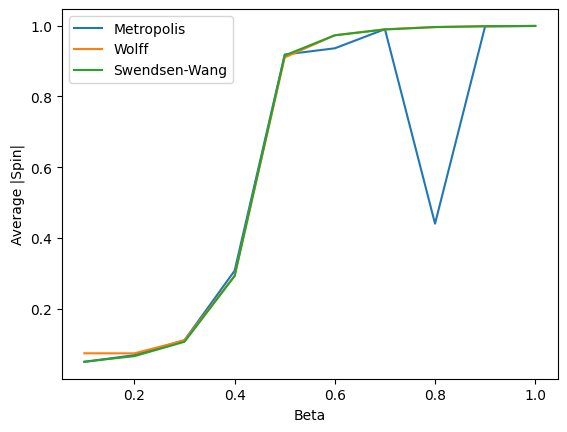

In [45]:
# 격자의 크기
L = 20

# 베타 값의 범위
betas = np.linspace(0.1, 1.0, 10)

# 사용될 알고리즘 목록
methods = [metropolis, wolff, swendsen_wang]
method_names = ['Metropolis', 'Wolff', 'Swendsen-Wang']

# 결과를 저장할 딕셔너리 초기화
results = {name: [] for name in method_names}

# 각 베타 값에 대해 세 가지 방법을 사용하여 평균 스핀 절댓값을 계산
for beta in betas:
    for method, name in zip(methods, method_names):
        avg_spin_abs = average_spin_abs(L, beta, method)
        results[name].append(avg_spin_abs)
        print(f'Beta: {beta:.2f}, Method: {name}, Avg |Spin|: {avg_spin_abs:.4f}')

# 결과를 플로팅
for name in method_names:
    plt.plot(betas, results[name], label=name)

plt.xlabel('Beta')
plt.ylabel('Average |Spin|')
plt.legend()
plt.show()

In [46]:
L = 5
B = 1

# L x L 격자의 각 위치에 고유한 번호 부여
num = np.arange(L**2).reshape((L,L))

# 이웃을 계산하는 함수
def neighbor(value):
    left = (value - 1) % L + (value // L) * L
    right = (value + 1) % L + (value // L) * L
    up = (value - L) % (L * L)
    down = (value + L) % (L * L)
    return [left, right, up, down]

# 전체 에너지를 계산하는 함수
def energy(S):
    E = 0
    for i in range(L**2):
        temp = neighbor(i)
        n = S[np.where(num == i)]
        l = S[np.where(num == temp[0])]
        r = S[np.where(num == temp[1])]
        u = S[np.where(num == temp[2])]
        d = S[np.where(num == temp[3])]
        value = n * (l + r + u + d)
        E += value
    return float(-E / 2)

# 새로운 상태에서 에너지를 계산하는 함수
def new_energy(new, i, j):
    temp = neighbor(num[i, j])
    n = new[i, j]
    l = new[np.where(num == temp[0])]
    r = new[np.where(num == temp[1])]
    u = new[np.where(num == temp[2])]
    d = new[np.where(num == temp[3])]
    change = 2 * n * (l + r + u + d)
    return float(change)

# 알파 값을 계산하는 함수
def alp(old, new):
    ex4 = np.exp(-B * 4)
    ex8 = np.exp(-B * 8)
    ex_dict = {4: ex4, 8: ex8}
    if old < new:
        result = ex_dict[new - old]
    else:
        result = 1
    return result

# 메트로폴리스 알고리즘 구현
def metropolis(L, B, steps=1000):
    S = np.random.choice([-1, 1], size=(L, L))
    E_list = []
    m_list = []
    old = energy(S)

    for _ in range(steps):
        random_index = np.random.randint(0, L, size=2)
        i, j = random_index
        new_S = np.copy(S)
        new_S[i, j] *= -1
        new = old - new_energy(new_S, i, j)
        p = alp(old, new)
        value = np.random.choice([old, new], p=[1 - p, p])
        if value == new:
            S = new_S
            old = new

        E_list.append(old)
        m_list.append(np.sum(S) / L**2)

    return E_list, m_list

In [47]:
def initialize_spins(L):
    return np.random.choice([-1, 1], size=(L, L))

def neighbors(L, x, y):
    neighbors = [(x, (y+1)%L), (x, (y-1)%L), ((x+1)%L, y), ((x-1)%L, y)]
    return neighbors

def wolff(spins, B):
    L = spins.shape[0]
    x, y = random.randint(0, L-1), random.randint(0, L-1)
    seed_spin = spins[x, y]

    cluster = {(x, y)}
    stack = [(x, y)]

    while stack:
        sx, sy = stack.pop()

        for nx, ny in neighbors(L, sx, sy):
            if (nx, ny) not in cluster and spins[nx, ny] == seed_spin:
                if random.random() < 1 - np.exp(-2 * B):
                    cluster.add((nx, ny))
                    stack.append((nx, ny))

    for (ix, iy) in cluster:
        spins[ix, iy] *= -1

    return spins

def simulate(L, B):
    spins = initialize_spins(L)

    for _ in range(10000):
        spins = wolff(spins, B)

    return np.abs(np.sum(spins)) / (L**2)

L = 5
B_values = np.arange(0.1, 1.0, 0.1)
spin_list = []

for b in B_values:
    spin_value = simulate(L, b)
    spin_list.append(spin_value)

In [ ]:
# 메트로폴리스 알고리즘 실행 및 결과 플롯
E_list, m_list = metropolis(L, B)
plt.plot(E_list)